In [1]:
import pandas as pd
import matplotlib.pyplot as plt

CNL_FILE = 'data/41586_2020_3052_MOESM4_ESM.txt'
cnl_df_raw = pd.read_table(CNL_FILE, sep='\t')
print('cnl_df\n', cnl_df_raw)

RL_FILE = 'data/41586_2020_3052_MOESM6_ESM.txt'
rl_df_raw = pd.read_table(RL_FILE, sep='\t')
print('rl_df\n', rl_df_raw)

TL_FILE = 'data/41586_2020_3052_MOESM8_ESM.txt'
tl_df_raw = pd.read_table(TL_FILE, sep='\t')
print('tl_df\n', tl_df_raw)

CHRV_FILE = 'data/41586_2020_3052_MOESM9_ESM.txt'
chrvl_df_raw = pd.read_table(CHRV_FILE, sep='\t')
print('chrvl_df\n', chrvl_df_raw)

LIBL_FILE = 'data/41586_2020_3052_MOESM11_ESM.txt'
libl_df_raw = pd.read_table(LIBL_FILE, sep='\t')
print('libl_df\n', libl_df_raw)

print(cnl_df_raw.keys())

cnl_df
        Sequence #                                           Sequence  \
0               1  TTTCTTCACTTATCTCCCACCGTCCACTCATGCGGGTGCTATGATA...   
1               2  TTTCTTCACTTATCTCCCACCGTCCGGATCTATAACGAAATGTCAA...   
2               3  TTTCTTCACTTATCTCCCACCGTCCATCAATAATTTATGTTCTTAA...   
3               4  TTTCTTCACTTATCTCCCACCGTCCAAAATAATTAGAAAGTAGCAC...   
4               5  TTTCTTCACTTATCTCCCACCGTCCCTTGAGAACCAAAAAAAAAAA...   
...           ...                                                ...   
19902       19903  TTTCTTCACTTATCTCCCACCGTCCCTTATTGTGAACATCATGACA...   
19903       19904  TTTCTTCACTTATCTCCCACCGTCCTTTGTTATTTTTATTAGTAGA...   
19904       19905  TTTCTTCACTTATCTCCCACCGTCCAGCAAGCAATAGCTGCAACAT...   
19905       19906  TTTCTTCACTTATCTCCCACCGTCCCTTATAACTCTATATTAATCC...   
19906       19907  TTTCTTCACTTATCTCCCACCGTCCGGTAAATGGCACAAGTAATAG...   

        Cyclizability (n=26)   Cyclizability (n=29)   Cyclizability (n=31)  \
0                   0.406731              -0.1062

## Preprocessing
- Use Columns: Sequence #, Sequence, C0 
- Get rid of 25 bp left and right adapters 
- Save in csv format 

In [2]:
def preprocess(df, file_name):
    columns = ["Sequence #", "Sequence", " C0"]
    df = df[columns]
    df.columns = ["Sequence #", "Sequence", "C0"]
    
    for i in range(len(df)):
        df.at[i, 'Sequence'] = df['Sequence'][i][25:-25] 
    
    df.to_csv(f'data/{file_name}.csv', index=False)
    
    return df

cnl_df = preprocess(cnl_df_raw, 'cnl')
rl_df = preprocess(rl_df_raw, 'rl')
tl_df = preprocess(tl_df_raw, 'tl')
chrvl_df = preprocess(chrvl_df_raw, 'chrvl')
libl_df = preprocess(libl_df_raw, 'libl')

print(cnl_df)

       Sequence #                                           Sequence        C0
0               1  ACTCATGCGGGTGCTATGATACAATTATATCTTATTTCCATTCCCA...  0.061849
1               2  GGATCTATAACGAAATGTCAAATAATTTTACGGTAATATAACTTAT... -0.285112
2               3  ATCAATAATTTATGTTCTTAACCTAACATTTGATGACCTTTGATGC...  1.114780
3               4  AAAATAATTAGAAAGTAGCACAATTTTTACAGTAATGTAGCACGCG...  0.414965
4               5  CTTGAGAACCAAAAAAAAAAAAAAAAAAATACTGATCCTTACAGGT...  0.353268
...           ...                                                ...       ...
19902       19903  CTTATTGTGAACATCATGACAAAACGAAATGAGAAAAGACCTTTCC... -0.741148
19903       19904  TTTGTTATTTTTATTAGTAGAGGTTATCAATTTATCCACGAAATTG...  0.090459
19904       19905  AGCAAGCAATAGCTGCAACATTTGGGCCGTTGCTAGAAGTTCCAAT... -0.828450
19905       19906  CTTATAACTCTATATTAATCCAAGTTCACCCTAAAAACAGATAAAA...  1.384206
19906       19907  GGTAAATGGCACAAGTAATAGACAATTTAATGAATAGGGTGTTATG...  0.100711

[19907 rows x 3 columns]


# Visulization
- Histogram

array([[<AxesSubplot:title={'center':'C0'}>]], dtype=object)

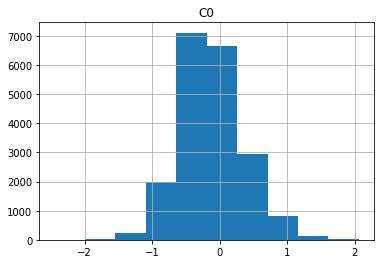

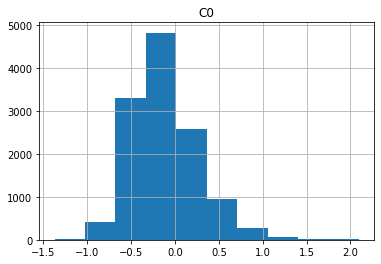

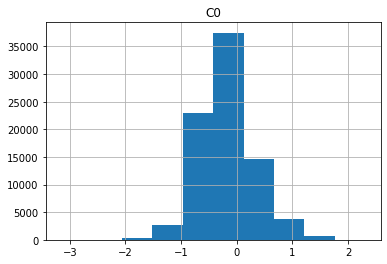

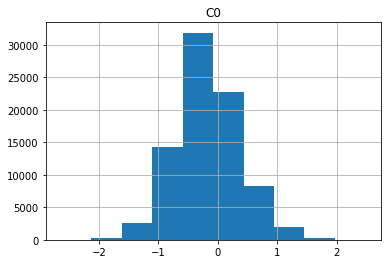

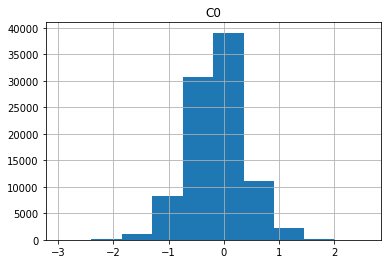

In [3]:
cnl_df.hist(column=['C0'])
rl_df.hist(column=['C0'])
tl_df.hist(column=['C0'])
chrvl_df.hist(column=['C0'])
libl_df.hist(column=['C0'])

# Comparison of C0 values of same sequences

     Sequence #x                                           Sequence       C0x  \
0            156  CAAACTGTCAGAGTTCTGGTTCAAGTTCCTGTCCAACGATGTTCGT... -0.518646   
1            562  GCTTCCTGGGGCATATTTTGTTAGGTTTTATTATTATGTTATTCAA...  0.829256   
2            719  AGTCGGAAGGTTACAAATGATTCATTAAACATGGGATCGTTATACG... -0.398306   
3            739  TGTTTTCCTATGATGACCAACCTTTGGAATTGGGTAATTCTAGGTG... -0.513404   
4           1264  GTCTTGAAGACCGTGAAGAAGGCTTCCAAGGCCAAGAATGTTAAAA...  0.079920   
..           ...                                                ...       ...   
107        19427  CCCTCCTATACCGAAGATGCAACTTTCATGGAAGGATATCCCTACT... -0.058800   
108        19606  CCCAACTTAGGATCCTTTTGAACCTCAAGAACTTAAAATGTCTCAA... -0.161593   
109        19749  CCTAAGCAGGAGAATGGCGGTATCTCGAAGCAGCCTGCGACACCAG... -0.350314   
110        19788  TCTGAAGAAGAATTCGAGGGTGAAAATCCAGCCGATAAAAGAAGGA... -0.639867   
111        19861  GCTACTTTTTAAGAGCGTTCCATCATTTCCACTTTAAAACCAGTCC... -0.239393   

     Sequence #y       C0y 

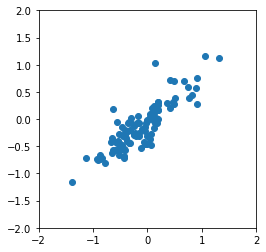

In [4]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

def get_intersection(df1, df2):
    merged_df = pd.merge(df1, df2, how='inner', on=['Sequence'])
    merged_df.columns = merged_df.columns.str.replace('_','')

    return merged_df 

# CNL - TL; CNL - ChrV; RL - LibL 
common_df = get_intersection(cnl_df, tl_df)
print(common_df)
plt.scatter(common_df['C0x'], common_df['C0y'])
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
corr, _ = pearsonr(common_df['C0x'], common_df['C0y'])
print('Pearsons correlation: %.3f' % corr)

print('r2 score: ', r2_score(common_df['C0x'], common_df['C0y']))

# Sort data

In [10]:
import math 
from util import sorted_split

# sorted_dfs = sorted_split(rl_df, n=len(rl_df), n_bins=12)

most_1000_loopable_df = sorted_split(cnl_df, n=1000, n_bins=1, ascending=False)[0]
least_1000_loopable_df = sorted_split(cnl_df, n=1000, n_bins=1, ascending=True)[0]
print(most_1000_loopable_df)​
print(least_1000_loopable_df)
most_1000_loopable_df['Sequence'].to_csv('./data/cnl_most_1000.txt', sep=' ', index=False, header=False)
least_1000_loopable_df['Sequence'].to_csv('./data/cnl_least_1000.txt', sep=' ', index=False, header=False)

       Sequence #                                           Sequence        C0
4914         4915  TATCCCAGGCTTCCCAATGCTCTTCCTACACATGGTAGCACAGAGA...  2.061331
12739       12740  CATGCCACTTCTCCCGCTATTGTTAAGAAGAGCTCCTTTACGACAA...  2.039580
11806       11807  GGTCAAAGAGCGTTTTATCTACACACAGCAAGAAGAGCGACGATAA...  2.035864
12068       12069  AGCCTATCTTTATTCGTTGAGCCTGTAGAAGAGCCGTTCTTTTAAG...  2.006009
11172       11173  ACCCATCTCTCAGCTCTTCCAGCCCAAAGTCCTCTACTTCCTCCCA...  1.977533
...           ...                                                ...       ...
12837       12838  GTTATTGGGCACTTTACGTGCATTAATGAGATCAGGGAGCGAGTAG...  0.706816
13858       13859  TGTAAGAATTACATAGGTACTGTTTTTGTACACAGAAGCTATAATT...  0.706778
4409         4410  GGATTTGATAAAATTTCCTCGCCCTGAGGGTCTCCATGGTAGTACT...  0.705979
8502         8503  GCACAGTCTACGCTGCAGTGTCAGAAGTTGCCCAATATAAGGAATT...  0.705637
17775       17776  TATTAAGCATCATATACTGCACACAGGAGCATGCATAGTGTCTGAA...  0.705606

[1000 rows x 3 columns]
       Sequence #          

## Draw shape value vs. base pair position
Almost all columns have same minimum and maximum value. This is expected. Since, DNA shape takes 5 base pairs and there are only 4^5 = 1024 different possible values. So, data is represented with mean and standard deviation. 

ext: EP
(1000, 50)
(1000, 50)
[[   nan    nan  -7.56  -9.65 -10.8   -8.51  -7.48  -7.46  -8.39 -10.1
  -10.1  -10.1  -10.8  -13.59  -8.38  -7.47  -7.24  -7.66  -5.64  -5.21
   -5.06  -5.38  -8.32  -9.42 -13.59 -13.59  -8.29  -7.46  -6.76  -6.72
   -6.9   -5.43  -7.31  -6.88  -7.69  -7.95  -8.06  -6.07  -6.82  -6.81
   -5.37  -5.57  -5.16  -5.51  -7.8   -8.76 -10.39  -8.76    nan    nan]
 [   nan    nan  -7.21  -6.87  -6.72  -7.14  -5.36  -7.1   -5.31  -6.73
   -6.99  -6.41  -9.29  -8.38  -7.56  -5.01  -6.7   -5.43  -6.02  -5.24
   -7.64  -8.76 -10.1  -10.1  -10.1  -10.1  -10.8   -8.51  -7.48  -7.69
   -7.61  -7.48  -7.46  -8.39 -10.1  -10.1  -10.1  -10.39  -8.76  -5.99
   -5.39  -6.64  -6.88  -7.69  -8.38  -8.77  -7.32  -5.65    nan    nan]
 [   nan    nan  -8.39 -10.39  -8.81  -5.64  -5.6   -5.49  -6.87  -7.36
   -5.28  -7.46  -7.24  -8.29  -9.42  -8.13  -5.38  -7.07  -5.41  -5.21
   -5.21  -5.26  -7.    -6.87  -6.87  -6.96  -5.6   -9.5   -7.95  -7.69
   -7.48  -7.75  -7.32  -5.65  -5

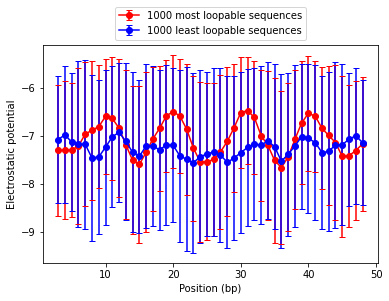

ext: HelT
(1000, 49)
(1000, 49)
[[  nan 35.91 36.39 32.74 36.66 35.11 32.18 34.14 36.84 33.38 34.16 31.19
  34.3  36.16 32.03 34.73 35.95 32.19 34.07 31.59 36.66 32.4  35.01 32.13
  35.56 34.64 34.97 35.17 34.53 35.06 35.16 34.4  35.37 32.46 34.69 35.41
  34.95 35.71 32.12 35.31 33.51 37.45 37.47 37.88 37.23 35.66 34.38 31.27
    nan]
 [  nan 33.87 34.57 33.49 36.52 35.91 35.14 34.84 31.98 35.37 34.62 35.41
  37.33 37.88 37.47 37.27 33.14 35.04 35.47 34.84 35.02 31.46 34.59 31.92
  34.58 34.45 32.29 36.66 31.43 34.67 32.16 36.21 36.41 37.57 37.37 36.17
  36.52 31.61 35.55 31.34 34.38 35.75 37.03 34.43 36.14 36.53 31.38 33.98
    nan]
 [  nan 31.14 34.27 35.97 32.88 35.19 35.59 34.65 35.22 35.25 33.83 34.71
  33.31 37.25 35.63 35.52 34.69 35.19 34.44 34.55 34.3  33.47 33.4  33.89
  31.3  36.53 36.14 33.56 35.48 34.5  36.39 33.37 34.95 31.65 34.91 32.12
  34.46 32.04 35.08 31.78 34.33 34.23 33.8  35.8  31.5  36.7  35.25 32.42
    nan]]
[[  nan 34.22 36.38 33.23 34.23 34.03 34.41 34.14 31

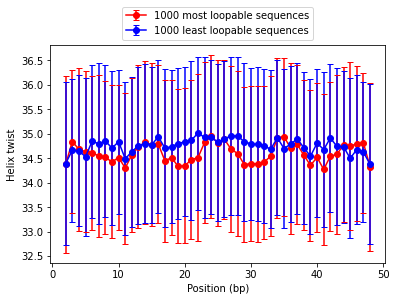

ext: MGW
(1000, 50)
(1000, 50)
[[ nan  nan 5.56 5.42 4.12 3.84 4.27 4.3  5.24 5.58 5.57 5.43 5.91 5.6
  4.76 3.38 3.38 3.68 4.05 3.75 4.18 4.73 5.04 5.   5.14 5.56 5.31 5.02
  4.73 4.78 5.22 5.8  5.29 5.04 4.57 4.53 4.86 5.14 5.47 5.93 5.35 4.85
  4.95 5.33 5.14 4.74 4.35 3.38  nan  nan]
 [ nan  nan 5.4  5.94 5.15 4.52 4.8  4.74 4.35 4.05 4.43 4.21 4.84 5.77
  5.76 5.33 4.74 4.36 4.05 4.31 4.76 4.63 4.82 4.61 5.23 5.5  5.27 5.23
  5.3  4.8  4.63 4.93 4.8  4.76 4.63 4.35 3.38 3.38 3.38 3.68 4.05 4.31
  4.51 4.98 5.65 5.82 5.27 4.27  nan  nan]
 [ nan  nan 4.52 4.14 5.3  5.94 5.79 5.52 4.54 4.33 5.46 6.01 5.76 4.8
  3.79 4.75 5.82 5.82 5.36 5.23 4.89 3.84 3.63 3.38 3.38 4.89 5.91 5.99
  5.27 5.14 5.32 5.76 6.07 5.28 5.11 4.8  5.76 6.01 5.37 5.13 5.48 5.67
  4.94 4.18 4.37 4.93 5.01 5.36  nan  nan]]
[[ nan  nan 3.84 4.46 4.79 4.46 4.81 5.28 5.53 3.79 4.75 5.73 5.85 4.67
  4.24 5.73 5.49 4.93 3.9  3.75 4.81 5.57 5.82 5.36 5.08 5.41 4.95 3.85
  3.34 4.31 5.15 6.   5.6  4.76 3.63 4.12 4.46 4.

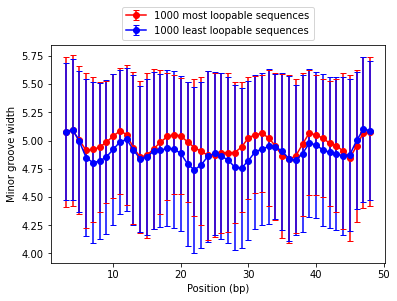

ext: ProT
(1000, 50)
(1000, 50)
[[   nan    nan  -4.6   -2.42  -2.47  -5.54  -0.14  -1.76  -4.39  -9.91
  -10.91 -10.17 -10.72  -8.63  -1.56  -1.38  -5.87  -3.34  -2.76  -1.55
   -8.63 -10.72 -10.17 -13.05 -14.47 -13.16 -10.58  -6.08  -2.99  -2.82
   -0.7   -6.38  -2.54  -6.62  -6.5   -8.08  -7.98  -4.25  -3.85  -6.76
   -1.38  -0.83  -6.5   -3.22 -10.71 -11.93 -10.81  -5.98    nan    nan]
 [   nan    nan -10.48  -6.08  -2.92  -2.56  -4.39  -9.44  -8.01  -1.47
   -3.6   -5.92  -0.9   -4.88  -9.91 -10.08  -7.97  -5.03  -3.26  -2.73
   -2.48  -0.53  -6.5   -3.06  -6.32  -6.55  -8.13  -7.37  -6.07 -10.38
  -10.91 -10.17 -12.03 -13.36 -14.95 -12.2  -11.34  -7.71  -6.7   -3.36
   -5.36  -9.61 -11.18 -14.95 -14.89 -13.79 -10.88  -3.14    nan    nan]
 [   nan    nan  -6.76  -1.72  -3.78  -3.73  -3.04  -1.55 -10.58 -11.93
  -10.55  -3.46  -8.51 -10.31  -6.12  -1.22  -2.34  -0.7   -6.38  -2.54
   -6.62  -3.22 -10.71 -11.93 -10.81  -5.95  -6.36  -1.38  -1.56 -10.58
  -11.93 -10.55  -3.46  -8.51 

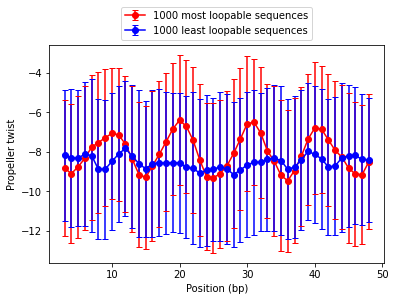

ext: Roll
(1000, 49)
(1000, 49)
[[  nan -3.47  6.81 -3.01  7.72 -1.71 -3.19 -4.28 -3.89 -0.93  3.87 -2.35
   3.13 -1.58 -1.28  5.51 -2.36 -2.45  5.15 -2.32 -3.42 -3.6  -4.47 -1.25
   7.72 -3.05  4.72 -2.31 -2.84  2.59 -1.79 -2.21 -1.11 -1.96 -2.92 -4.94
  -3.79 -2.76  3.48 -1.83 -4.1  -3.25 -3.58 -0.79 -1.61 -2.56 -2.67 -1.11
    nan]
 [  nan -4.21 -6.58  5.68 -2.28  4.15 -0.88 -2.46 -2.12 -2.33  3.96 -3.61
  -4.29 -5.17  7.18 -3.06 -3.13  5.37 -2.45  6.06 -5.34 -3.13 -0.94  8.17
  -3.92 -1.91  6.98 -1.23 -0.64 -2.13 -3.2   4.94 -3.72 -4.15 -6.42 -3.49
  -1.73  5.74 -3.58 -1.6  -1.32  5.85 -2.09 -5.04 -1.48 -1.48  1.31 -0.62
    nan]
 [  nan -2.29 -2.46 -0.92 -1.29  4.41 -2.12 -2.84  2.59 -1.79 -2.06 -1.87
  -2.04  3.96 -2.94 -3.19 -3.87 -2.88  5.03 -1.31 -4.57  3.9  -1.23 -3.47
   7.73 -1.25 -5.12 -4.2  -4.87 -3.38  0.39  3.95 -3.02 -0.95  3.82 -5.58
  -4.67 -3.16 -2.43  5.93 -0.54 -3.47  7.73 -1.71 -3.9  -4.36 -3.89 -2.89
    nan]]
[[  nan -3.54  6.87 -2.57 -5.21 -2.    6.98 -1.25 -1

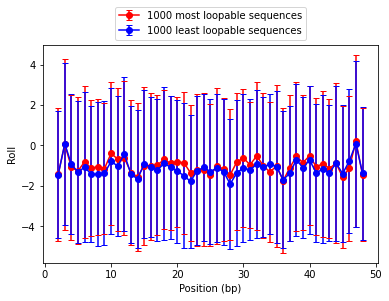

In [16]:
from shape import find_valid_cols
from util.util import PathObtain

import numpy as np
import matplotlib.pyplot as plt
import random
        
dna_shape_ext = ['EP', 'HelT', 'MGW', 'ProT', "Roll"]

full_form = {
    'EP': 'Electrostatic potential',
    'HelT': 'Helix twist',
    'MGW': 'Minor groove width',
    'ProT': 'Propeller twist',
    'Roll': 'Roll'
}

for ext in dna_shape_ext:
    print('ext:', ext)
    marr = get_shape(f"{PathObtain.data_dir()}/cnl_most_1000.txt.{ext}")        
    larr = get_shape(f"{PathObtain.data_dir()}/cnl_least_1000.txt.{ext}")    
    print(marr.shape)
    print(larr.shape)

    # Show 3 random examples
    print(marr[random.sample(range(marr.shape[0]), 3)])
    print(larr[random.sample(range(marr.shape[0]), 3)])

    # Cut off not-nan columns 
    valid_cols = find_valid_cols(marr[0].flatten())
    x = valid_cols + 1
    marr = marr[:, valid_cols]
    larr = larr[:, valid_cols]

    ym = marr.mean(axis=0)   
    yl = larr.mean(axis=0)
    
    # ymerr = [np.subtract(ym, _min), np.subtract(_max, ym)]
    # ylerr = [np.subtract(yl, larr.min(axis=0)), np.subtract(larr.max(axis=0), yl)]
    ymerr = marr.std(axis=0)
    ylerr = larr.std(axis=0)
    print('ymerr\n', ymerr)
    print('ylerr\n', ylerr)
    
    plot_opt = 'std'   # 'mean' or 'std'
    if plot_opt == 'std':
        plt.errorbar(x, ym, yerr = ymerr, capsize=3, linestyle='-', marker='o', color='r', label='1000 most loopable sequences')
        plt.errorbar(x, yl, yerr = ylerr, capsize=3, linestyle='-', marker='o', color='b', label='1000 least loopable sequences')
    elif plot_opt == 'mean':
        plt.plot(x, ym, linestyle='-', marker='o', color='r', label='1000 most loopable sequences')
        plt.plot(x, yl, linestyle='-', marker='o', color='b', label='1000 least loopable sequences') 
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20))
    plt.xlabel('Position (bp)')
    plt.ylabel(f'{full_form[ext]}')
    plt.savefig(f'{PathObtain.figure_dir()}/cnl_{ext.lower()}_{plot_opt}.png', bbox_inches="tight")
    plt.show()


## Training Neural Network

In [19]:
from shape import get_shape

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import subprocess

df = rl_df 
df_name = 'rl'

data_path = f"data/{df_name}.txt"
df['Sequence'].to_csv(f'./{data_path}', sep=' ', index=False, header=False)

subprocess.run(["Rscript", "./dna_shape_model/R/R/shape.r", f"/home/sakib/playground/machine_learning/bendability/{data_path}"], capture_output = True)


dna_shape_ext = ['EP', 'HelT', 'MGW', 'ProT', "Roll"]

X = get_shape(f"./data/{df_name}.txt.{dna_shape_ext[3]}")        

# Cut off not-nan columns 
valid_cols = find_valid_cols(X[0].flatten())

X = X[:, valid_cols]

y = df['C0'].to_numpy()

print('X', X.shape, 'y', y.shape)

# Show 3 random samples
rand_indices = random.sample(range(X.shape[0]), 5)
print(X[rand_indices])
print(y[rand_indices])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_scaled, y_train)
print(regr.predict(X_test_scaled[:2]))

print("Accuracy on training set: {:.3f}".format(regr.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test_scaled, y_test)))

X (12472, 46) y (12472,)
[[ -7.22  -8.43  -6.19  -0.56  -2.62  -5.89  -8.57  -9.4  -11.69 -11.7
   -7.48  -8.49  -3.97  -6.09  -2.98  -5.7   -7.47  -8.06  -8.36  -5.01
   -2.62  -0.56  -5.77 -10.31  -9.96  -6.26 -12.78 -13.54 -11.89  -7.21
   -5.43  -1.54  -6.51  -6.51  -1.54  -6.64  -7.11  -3.48  -5.78  -7.34
   -3.9   -8.26 -11.61  -9.7  -10.72  -2.74]
 [ -8.01  -1.56  -1.38  -7.34  -6.88  -8.28  -7.07 -10.92  -9.7  -11.61
   -7.03  -3.22  -6.62  -2.78  -8.23  -7.66 -10.54  -8.13  -1.5   -2.38
   -3.2   -6.69  -3.97  -7.81  -3.9   -8.16  -8.16  -3.05  -7.78  -6.12
   -4.29  -7.97 -10.83 -10.83  -7.55  -6.49  -6.78  -1.28  -2.38  -3.14
  -10.75 -11.29  -6.26  -9.96 -10.31  -7.55]
 [ -9.51  -9.46  -9.61  -5.36  -3.04  -6.12  -6.8   -2.78  -7.85  -7.48
   -3.12  -2.76  -1.2   -6.36  -6.08  -6.75  -0.83  -1.3   -6.54  -7.44
   -3.97  -8.16  -6.19  -1.39  -5.29  -7.65  -7.37  -6.05  -7.5   -3.05
   -8.16  -8.84  -7.92  -7.92  -9.05  -8.42  -6.69  -4.33  -7.    -7.04
   -6.82  -8.47  -7.92

# Find Bendability Quotient

In [1]:
from bq import find_bq 

UNIT_NUCLEOTIDE_SIZE = 2

seq_bq = find_bq(rl_df, unit_size=UNIT_NUCLEOTIDE_SIZE)

sorted_unit_seq_bq_pair = sorted(seq_bq, key=lambda x: x[1])

# Plot
if len(sorted_unit_seq_bq_pair) > 20:
    pairs_to_show = [ pair[0] for (i, pair) in enumerate(sorted_unit_seq_bq_pair) if i < 10 or i >= len(sorted_unit_seq_bq_pair) - 10 ]
else:
    pairs_to_show = sorted_unit_seq_bq_pair

x = [ pair[0] for pair in pairs_to_show]
y = [ pair[1] for pair in pairs_to_show]

plt.bar(x, y)

NameError: name 'rl_df' is not defined